# Regression Exercise

Fit a `LinearRegressionWithSGD` and a `RandomForest` model to the three dataset defined below.

## Loading all libraries

In [1]:
# import spark
from pyspark import SparkContext
# initialize a new Spark Context to use for the execution of the script
sc = SparkContext(appName="MY-APP-NAME", master="local[*]")
# prevent useless logging messages
sc.setLogLevel("ERROR")

In [2]:
import math
import numpy as np
import random
from pyspark.mllib.regression import LinearRegressionWithSGD
from pyspark.mllib.tree import RandomForest
from pyspark.mllib.regression import LabeledPoint

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

## Data generation

In [4]:
def lin_formula(x):
    return -1.5 + x * 0.5
def sq_formula(x):
    return -1.5 + 0.5 * (x-(interval[1]-interval[0])/2.0) ** 2
def sin_formula(x):
    return -0.5 + np.sin(x/0.75)

In [5]:
number_points = 200
std_dev = 0.15
interval = (0, 5)

np.random.seed(0)
real_x = np.linspace(interval[0], interval[1], (interval[1]-interval[0])*100)
random_x = np.random.uniform(interval[0], interval[1], number_points)

In [6]:
def add_error(x, epsilon=0):
    return x + np.random.normal(0, epsilon, x.shape)

real_lin = lin_formula(real_x)
real_sq = sq_formula(real_x)
real_sin = sin_formula(real_x)

random_lin = add_error(lin_formula(random_x), std_dev)
random_sq = add_error(sq_formula(random_x), std_dev)
random_sin = add_error(sin_formula(random_x), std_dev)

## Visualization

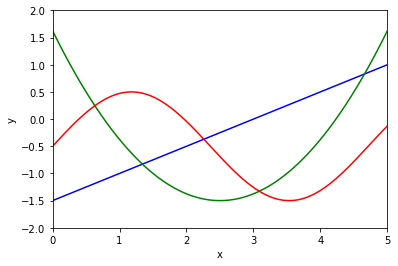

In [7]:
plt.plot(real_x, real_lin, c="b")
plt.plot(real_x, real_sq, c="g")
plt.plot(real_x, real_sin, c="r")
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(interval)
plt.ylim((-2,2))
plt.show()

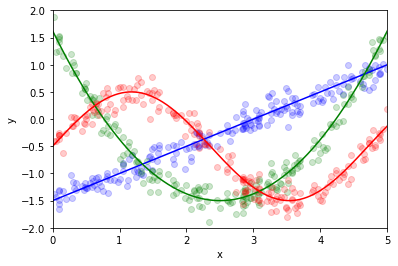

In [8]:
plt.scatter(random_x, random_lin, c="b", alpha=0.2)
plt.scatter(random_x, random_sq, c="g", alpha=0.2)
plt.scatter(random_x, random_sin, c="r", alpha=0.2)

plt.plot(real_x, real_lin, c="b", alpha=1)
plt.plot(real_x, real_sq, c="g", alpha=1)
plt.plot(real_x, real_sin, c="r", alpha=1)

plt.xlabel('x')
plt.ylabel('y')
plt.xlim(interval)
plt.ylim((-2,2))
plt.show()

# Training & Test

To complete here!